In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer_info = pd.read_csv('/Users/vasilisa533/Desktop/SD.csv')
customer_info.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
186,100000187,1,1,74,3,214364,2,1
1537,100001538,1,1,42,2,82558,0,0
1051,100001052,0,0,61,2,139380,1,1
808,100000809,0,0,55,1,231992,2,2
1355,100001356,1,1,23,1,112853,1,0


In [3]:
customer_info.info(5) # understand the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
num_columns = ['ID', 'Age', 'Income']
cat_columns = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
customer_info[cat_columns] = customer_info[cat_columns].astype('str')

In [5]:
customer_info.describe(include='object').T 

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


In [6]:
customer_info.describe().T 

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


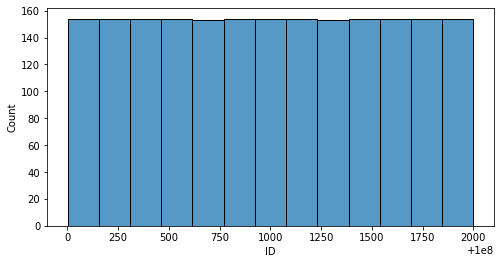

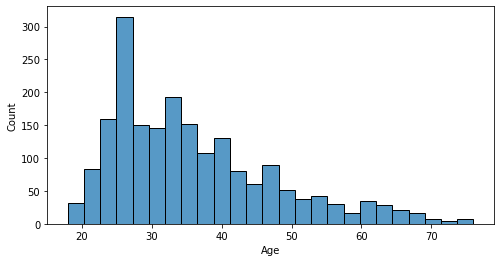

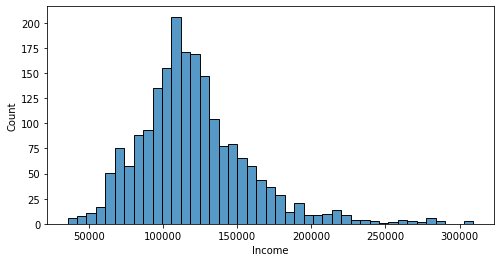

In [7]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=customer_info, x=numerical)
    plt.savefig(numerical + '.png')

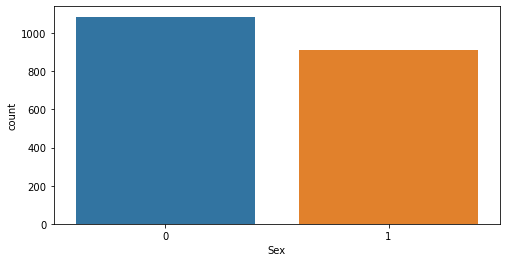

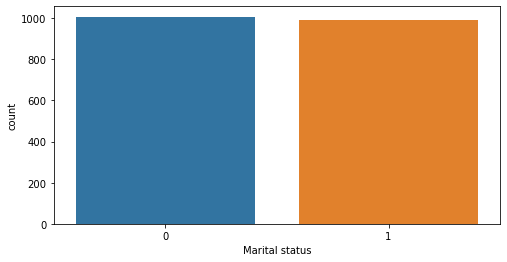

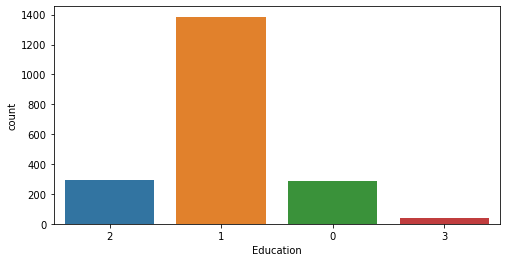

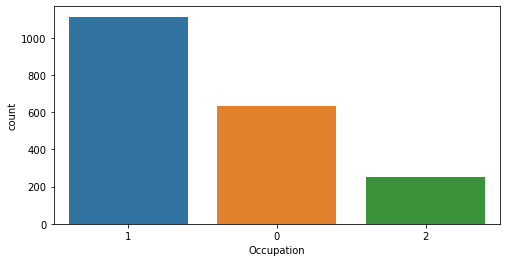

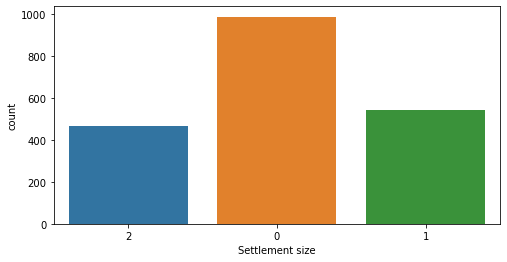

In [8]:
for category in cat_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=customer_info, x=category)

<AxesSubplot:xlabel='Age', ylabel='Income'>

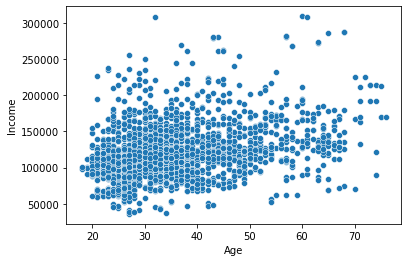

In [9]:
sns.scatterplot(x='Age', y='Income', data=customer_info)

In [10]:
import scipy.stats as stats
print(stats.pearsonr(customer_info['Age'], customer_info['Income']))

(0.3406101637317377, 1.6443825442281613e-55)


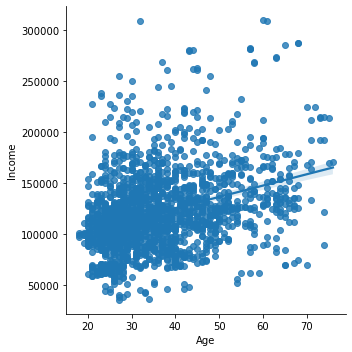

In [11]:
sns.lmplot(x='Age', y='Income', data=customer_info)

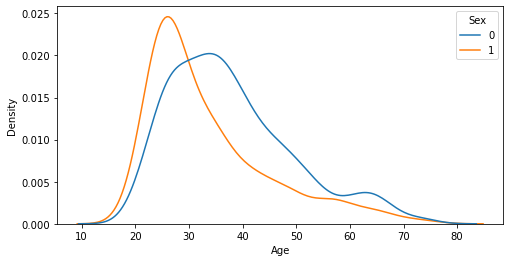

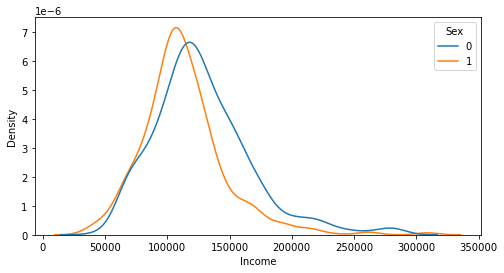

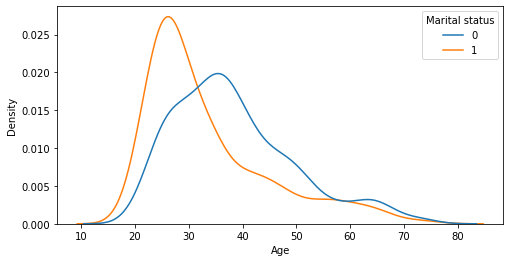

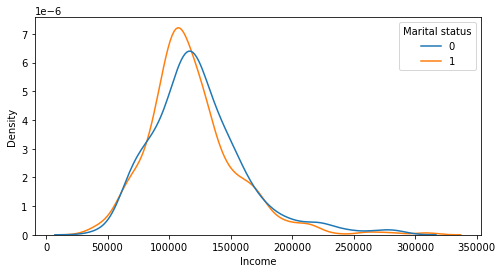

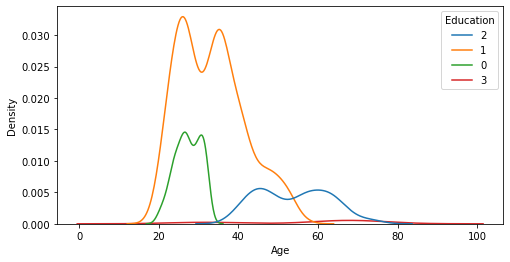

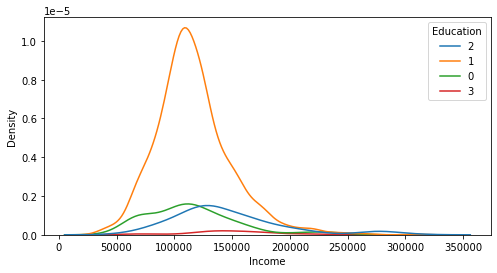

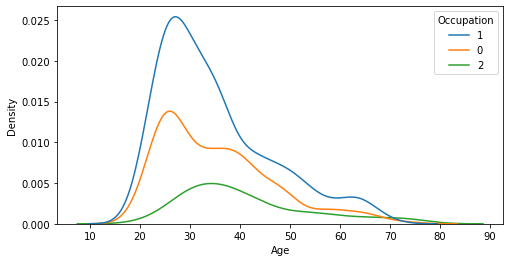

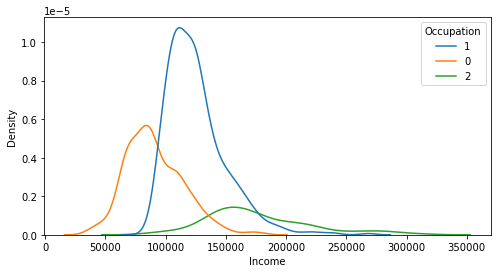

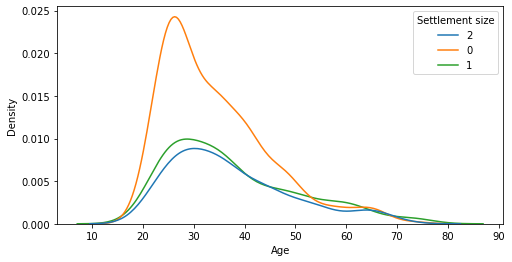

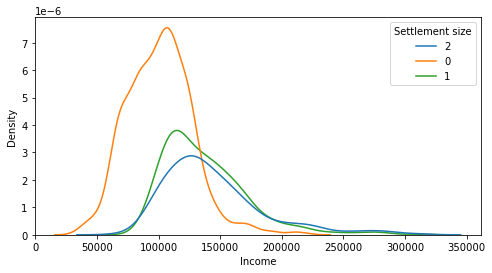

In [13]:
for category in cat_columns:
    for numerical in num_columns:
        if numerical != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=customer_info, x=numerical, hue=category)

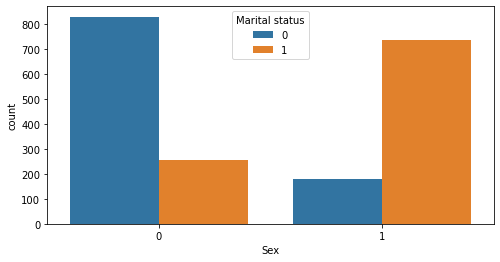

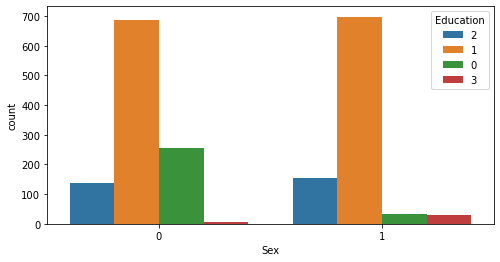

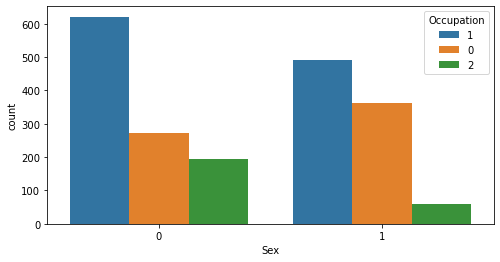

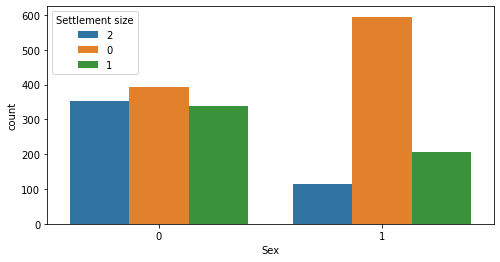

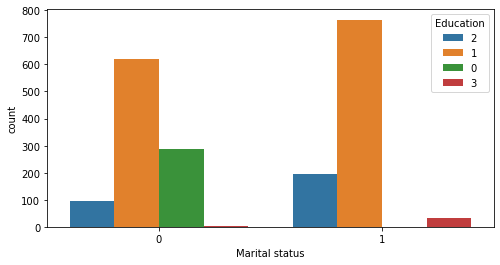

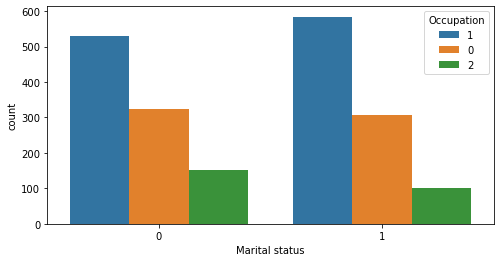

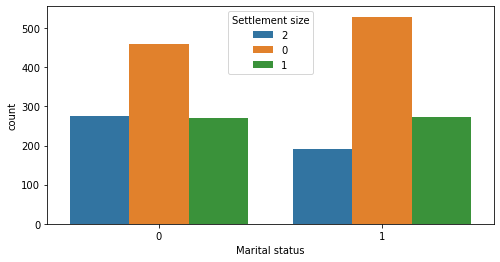

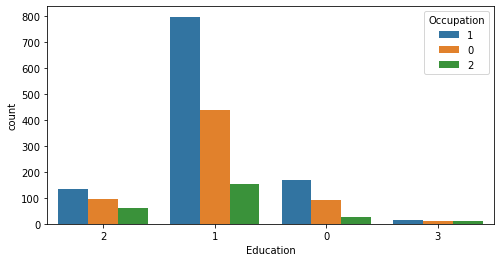

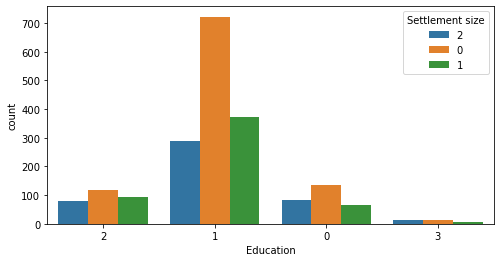

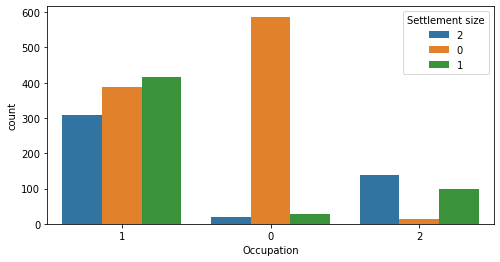

In [14]:
cat_aux = cat_columns.copy()
for category1 in cat_columns:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=customer_info, x=category1, hue=category2)

In [31]:
customer_info[cat_columns] = customer_info[cat_columns].astype(int) # convert categorical columns back from string to integer

In [37]:
scaler = MinMaxScaler()
col_names = customer_info.columns
X = scaler.fit_transform(customer_info)
X = pd.DataFrame(data=X, columns = col_names)
X.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.500000,0.457000,0.496500,0.308776,0.346000,0.311197,0.405250,0.369500
std,0.288892,0.498272,0.500113,0.202059,0.199927,0.139321,0.319294,0.406266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.155172,0.333333,0.226048,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.258621,0.333333,0.291434,0.500000,0.500000
75%,0.750000,1.000000,1.000000,0.413793,0.333333,0.373778,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import umap

ModuleNotFoundError: No module named 'umap'

In [38]:
X1 = X.copy()

In [39]:
n_clusters = range (2,12)  #How many clusters to look for?
inertia = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=fixed_random_state)
    _ = kmeans.fit_predict(X1)
    inertia.append(kmeans.inertia_)

NameError: name 'fixed_random_state' is not defined

In [40]:
fig, axs = plt.subplots(figsize=figure_size)
sns.lineplot(x=n_clusters, y=inertia)
axs.set_xlabel("Number of clusters")
axs.set_ylabel("Inertia")
axs.set_title("Elbowplot")
plt.show()

NameError: name 'figure_size' is not defined